In [1]:
import numpy as np
import pandas as pd
import os 
import time
import deepdish.io as dd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import torch
import torch.nn as nn
import torchvision
import torch.nn.functional as F

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler

from svi import SVI
import models as m
import datasets as d

# Load and Prepare Data

In [2]:
data = dd.load("sequenced_data_for_VAE_lenght-160_stride-10.h5")

In [3]:
X,y = data["X"], data["y"]

In [4]:
X.shape

torch.Size([83680, 160])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.2, random_state=666, shuffle=True)

In [6]:
X_train.shape

(66944, 160)

In [7]:
y_train.shape

(66944,)

In [8]:
def RNNPreporces_batch(X, y, batch_size):
    length = (X.shape[0]//batch_size)*batch_size
    return X[:length, :], y[:length]

In [9]:
X_train, y_train = RNNPreporces_batch(X_train, y_train, batch_size=300)
X_test, y_test = RNNPreporces_batch(X_test, y_test, batch_size=300)

In [10]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(66900, 160)
(66900,)
(16500, 160)
(16500,)


In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
train = d.H_alphaSequences(X_train, y_train)
test = d.H_alphaSequences(X_test, y_test)

In [13]:
train_loader = torch.utils.data.DataLoader(dataset = train, batch_size=300, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset = test, batch_size=300, shuffle=True)

# Model setup

In [14]:
torch.cuda.is_available()

True

In [15]:
torch.cuda.get_device_name()

'GeForce GTX 1070'

In [16]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [87]:
model_name = "DeepLSTM_VAE_NLL_440ep_hidden-128_lr-{1e-3, 1e-4}_bs-300"

In [18]:
#deepmodel.eval()

In [ ]:
deepmodel = m.DeepLSTM_VAE(
                        sequence_len=160, 
                        n_features=1,
                        latent_dim=15,
                        hidden_size=128,
                        num_layers=1,
                        batch_size=300,
                        use_cuda=True
                        )
svi = SVI(
        vae_model=deepmodel,
        optimizer=torch.optim.Adam(deepmodel.parameters(), lr=1e-3),
        loss_function="GaussianNLL",
        verbose=True
        )

In [20]:
loss_hist = svi(epochs=100, train_loader=train_loader, validation_loader=test_loader, flatten=False)

Epoch [1/100], average_loss:232.2674, validation_loss:229.4445
Epoch [2/100], average_loss:228.6316, validation_loss:227.5014
Epoch [3/100], average_loss:227.5935, validation_loss:227.0334
Epoch [4/100], average_loss:227.2740, validation_loss:226.9796
Epoch [5/100], average_loss:227.2011, validation_loss:226.8495
Epoch [6/100], average_loss:218.8171, validation_loss:204.6213
Epoch [7/100], average_loss:180.2404, validation_loss:182.5264
Epoch [8/100], average_loss:190.3515, validation_loss:209.6942
Epoch [9/100], average_loss:211.9988, validation_loss:215.7347
Epoch [10/100], average_loss:214.4738, validation_loss:213.0050
Epoch [11/100], average_loss:212.7349, validation_loss:211.0823
Epoch [12/100], average_loss:258.7259, validation_loss:228.4693
Epoch [13/100], average_loss:227.3914, validation_loss:226.7554
Epoch [14/100], average_loss:226.1011, validation_loss:217.2383
Epoch [15/100], average_loss:185.6566, validation_loss:171.8484
Epoch [16/100], average_loss:176.3111, validation

In [34]:
loss_hist = svi(epochs=10, train_loader=train_loader, validation_loader=test_loader, flatten=False)

Epoch [1/10], average_loss:118.9112, validation_loss:110.3110
Epoch [2/10], average_loss:104.0790, validation_loss:99.7609
Epoch [3/10], average_loss:99.8304, validation_loss:96.9423
Epoch [4/10], average_loss:96.0117, validation_loss:96.2270
Epoch [5/10], average_loss:95.7246, validation_loss:92.7654
Epoch [6/10], average_loss:94.6272, validation_loss:89.4547
Epoch [7/10], average_loss:91.6074, validation_loss:87.5206
Epoch [8/10], average_loss:91.5773, validation_loss:87.2884
Epoch [9/10], average_loss:90.3979, validation_loss:87.7472
Epoch [10/10], average_loss:90.1586, validation_loss:87.9652


In [38]:
loss_hist = svi(epochs=50, train_loader=train_loader, validation_loader=test_loader, flatten=False)

Epoch [1/50], average_loss:90.3859, validation_loss:87.7317
Epoch [2/50], average_loss:90.8967, validation_loss:87.3893
Epoch [3/50], average_loss:89.1984, validation_loss:88.0348
Epoch [4/50], average_loss:89.4039, validation_loss:90.9386
Epoch [5/50], average_loss:89.8204, validation_loss:88.2338
Epoch [6/50], average_loss:89.5910, validation_loss:85.7840
Epoch [7/50], average_loss:88.1333, validation_loss:84.9494
Epoch [8/50], average_loss:88.5093, validation_loss:85.0150
Epoch [9/50], average_loss:87.3547, validation_loss:87.1276
Epoch [10/50], average_loss:88.8658, validation_loss:86.8698
Epoch [11/50], average_loss:87.8739, validation_loss:84.5378
Epoch [12/50], average_loss:87.2423, validation_loss:85.8101
Epoch [13/50], average_loss:86.8035, validation_loss:86.9833
Epoch [14/50], average_loss:87.3653, validation_loss:85.3669
Epoch [15/50], average_loss:86.9267, validation_loss:83.8241
Epoch [16/50], average_loss:86.4304, validation_loss:86.4059
Epoch [17/50], average_loss:87.24

KeyboardInterrupt: 

In [48]:
loss_hist = svi(epochs=50, train_loader=train_loader, validation_loader=test_loader, flatten=False)

Epoch [1/50], average_loss:70.1176, validation_loss:49.3084
Epoch [2/50], average_loss:30.8471, validation_loss:26.0848
Epoch [3/50], average_loss:19.3099, validation_loss:-2.0697
Epoch [4/50], average_loss:5.7979, validation_loss:-1.0184
Epoch [5/50], average_loss:-0.8231, validation_loss:-7.6315
Epoch [6/50], average_loss:-8.7690, validation_loss:49.5703
Epoch [7/50], average_loss:-7.4701, validation_loss:-12.8222
Epoch [8/50], average_loss:-8.2912, validation_loss:-7.1941
Epoch [9/50], average_loss:-14.3656, validation_loss:-23.5662
Epoch [10/50], average_loss:-14.9987, validation_loss:-19.0441
Epoch [11/50], average_loss:-17.3846, validation_loss:-13.4717
Epoch [12/50], average_loss:-24.5620, validation_loss:-29.8205
Epoch [13/50], average_loss:-27.8605, validation_loss:-27.6369
Epoch [14/50], average_loss:-22.5021, validation_loss:10.2068
Epoch [15/50], average_loss:-21.4233, validation_loss:-28.5240
Epoch [16/50], average_loss:-27.4813, validation_loss:-27.5973
Epoch [17/50], ave

In [58]:
loss_hist = svi(epochs=90, train_loader=train_loader, validation_loader=test_loader, flatten=False)

Epoch [1/90], average_loss:-67.2606, validation_loss:-87.9810
Epoch [2/90], average_loss:-71.4463, validation_loss:-75.7390
Epoch [3/90], average_loss:-72.1301, validation_loss:-60.2329
Epoch [4/90], average_loss:-75.0823, validation_loss:-81.6883
Epoch [5/90], average_loss:-81.8494, validation_loss:-77.8773
Epoch [6/90], average_loss:-73.5161, validation_loss:-66.6065
Epoch [7/90], average_loss:-63.3975, validation_loss:-60.9430
Epoch [8/90], average_loss:-74.4655, validation_loss:-54.5530
Epoch [9/90], average_loss:-80.0722, validation_loss:-82.9341
Epoch [10/90], average_loss:-84.1659, validation_loss:-74.5078
Epoch [11/90], average_loss:-79.4417, validation_loss:-72.1323
Epoch [12/90], average_loss:-77.1369, validation_loss:-79.7197
Epoch [13/90], average_loss:-74.7197, validation_loss:-78.4166
Epoch [14/90], average_loss:-73.5375, validation_loss:-63.3898
Epoch [15/90], average_loss:-74.0424, validation_loss:-84.2043
Epoch [16/90], average_loss:-67.3137, validation_loss:-88.3533
E

In [67]:
for g in svi.optimizer.param_groups:
    g['lr'] = 1e-4
    print("changed")

changed


In [68]:
loss_hist = svi(epochs=100, train_loader=train_loader, validation_loader=test_loader, flatten=False)

Epoch [1/100], average_loss:-108.5474, validation_loss:-107.0514
Epoch [2/100], average_loss:-109.2541, validation_loss:-107.8013
Epoch [3/100], average_loss:-109.4732, validation_loss:-107.8800
Epoch [4/100], average_loss:-109.4920, validation_loss:-108.0472
Epoch [5/100], average_loss:-109.5445, validation_loss:-107.9962
Epoch [6/100], average_loss:-109.6374, validation_loss:-107.8375
Epoch [7/100], average_loss:-109.6043, validation_loss:-108.1426
Epoch [8/100], average_loss:-109.6905, validation_loss:-107.9463
Epoch [9/100], average_loss:-109.7217, validation_loss:-107.5434
Epoch [10/100], average_loss:-109.7745, validation_loss:-107.9128
Epoch [11/100], average_loss:-109.8829, validation_loss:-108.1589
Epoch [12/100], average_loss:-109.8319, validation_loss:-108.4003
Epoch [13/100], average_loss:-109.9288, validation_loss:-108.2398
Epoch [14/100], average_loss:-109.9374, validation_loss:-108.1904
Epoch [15/100], average_loss:-109.9211, validation_loss:-108.2274
Epoch [16/100], ave

In [86]:
loss_hist = svi(epochs=30, train_loader=train_loader, validation_loader=test_loader, flatten=False)

Epoch [1/30], average_loss:-116.2562, validation_loss:-114.7130
Epoch [2/30], average_loss:-116.7612, validation_loss:-114.7185
Epoch [3/30], average_loss:-116.8663, validation_loss:-115.0665
Epoch [4/30], average_loss:-116.8841, validation_loss:-115.3434
Epoch [5/30], average_loss:-116.9825, validation_loss:-115.3687
Epoch [6/30], average_loss:-117.0130, validation_loss:-115.4542
Epoch [7/30], average_loss:-117.0438, validation_loss:-115.4089
Epoch [8/30], average_loss:-117.1447, validation_loss:-115.7290
Epoch [9/30], average_loss:-117.4155, validation_loss:-115.7377
Epoch [10/30], average_loss:-117.4563, validation_loss:-115.6656
Epoch [11/30], average_loss:-116.9031, validation_loss:-115.6539
Epoch [12/30], average_loss:-117.5173, validation_loss:-114.8213
Epoch [13/30], average_loss:-117.6093, validation_loss:-116.2099
Epoch [14/30], average_loss:-117.7218, validation_loss:-116.1657
Epoch [15/30], average_loss:-118.0045, validation_loss:-116.0426
Epoch [16/30], average_loss:-117.9

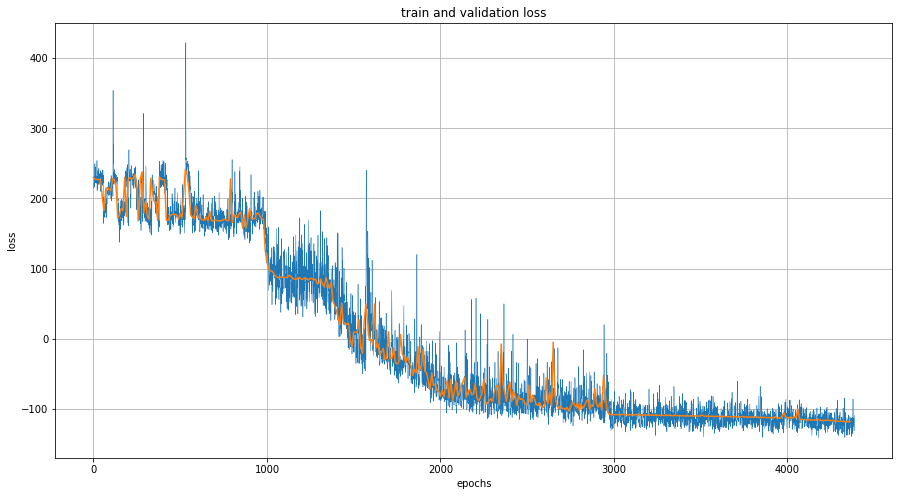

In [88]:
plt.figure(figsize=(15,8))
plt.title("train and validation loss")
epoch_axis = np.arange(len(svi.loss_history["train"]))
plt.plot(epoch_axis, np.array(svi.loss_history["train"]), lw=0.5) #np.arange(len(svi.loss_history["validation"]))*10
plt.plot(np.arange(len(svi.loss_history["validation"]))*10, svi.loss_history["validation"])
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [89]:
torch.save(svi.model, f"VAE-saved_model_and_losses/{model_name}.pt")
torch.save(svi.optimizer, f"VAE-saved_model_and_losses/{model_name}_optimizer.pt")
dd.save(f"VAE-saved_model_and_losses/{model_name}_loss_history.h5", svi.loss_history)

# Evaluation

cuda:0


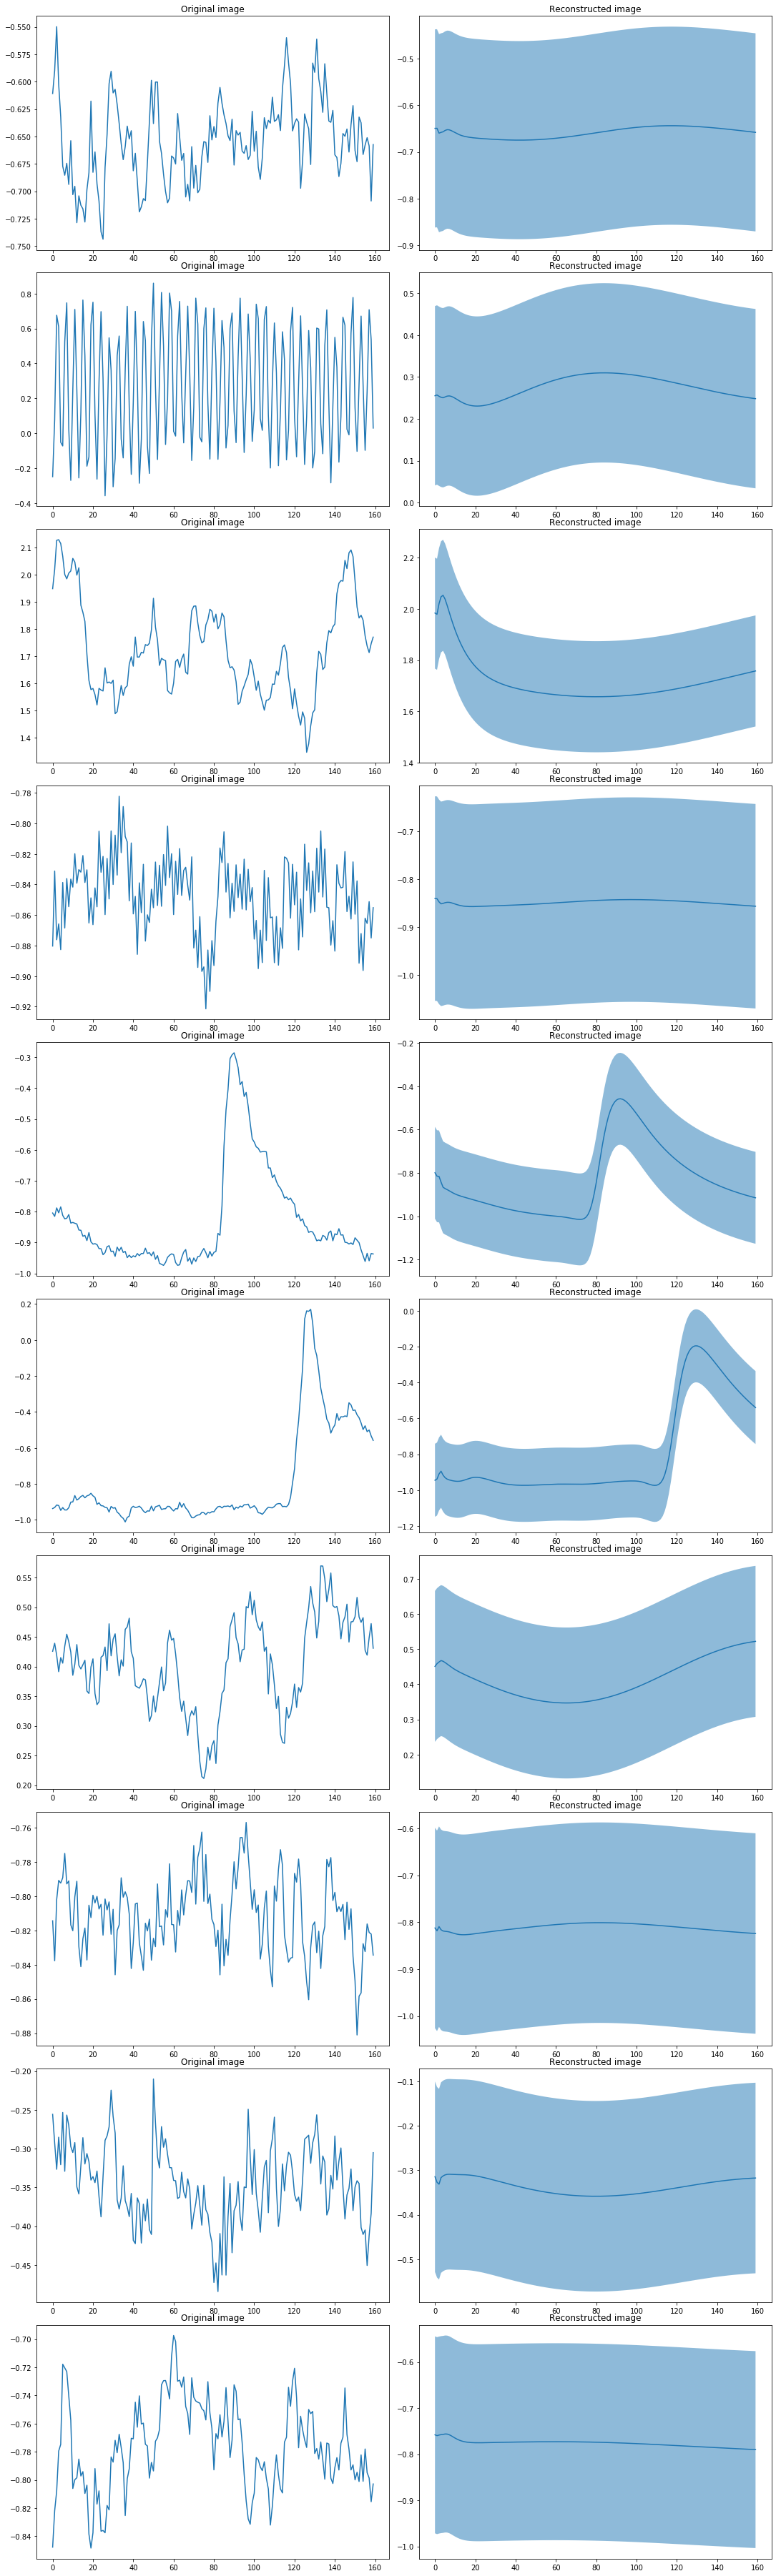

In [90]:
print(device)
X,_ = next(iter(test_loader))
output, mu, sigma = svi.model(X.to(device))
#X_hat = output.cpu().detach().numpy()
mu_hat = output[0].cpu().detach().numpy()
sigma = output[1].cpu().detach().numpy()

fig, axes = plt.subplots(10, 2, figsize=(15,50))
fig.tight_layout()
for i in range(10):
    axes[i][0].plot(X[i])
    axes[i][0].set_title('Original image')
    #axes[i][1].plot(X_hat[i])
    axes[i][1].plot(mu_hat[i])
    axes[i][1].fill_between(np.arange(160), mu_hat[i] + 2 * sigma[i], mu_hat[i] - 2 * sigma[i], alpha = 0.5, label="Uncertainty")
    axes[i][1].set_title('Reconstructed image')

# Load Model

In [91]:
mod = torch.load(f"VAE-saved_model_and_losses/{model_name}.pt")

In [92]:
mod.eval()

DeepLSTM_VAE(
  (encoder_reshape): Reshape()
  (encoder_lstm): LSTM(1, 128)
  (encoder_output): VariationalLayer(
    (mu): Linear(in_features=128, out_features=15, bias=True)
    (rho): Linear(in_features=128, out_features=15, bias=True)
    (softplus): Softplus(beta=1, threshold=20)
  )
  (decoder_hidden): Linear(in_features=15, out_features=128, bias=True)
  (decoder_lstm): LSTM(1, 128)
  (decoder_output): RecurrentDecoderOutput(
    (mu): Linear(in_features=128, out_features=1, bias=True)
    (rho): Linear(in_features=20480, out_features=1, bias=True)
    (softplus): Softplus(beta=1, threshold=20)
  )
)

In [93]:
z, mu, sigma = mod.encoder(X.to(device))

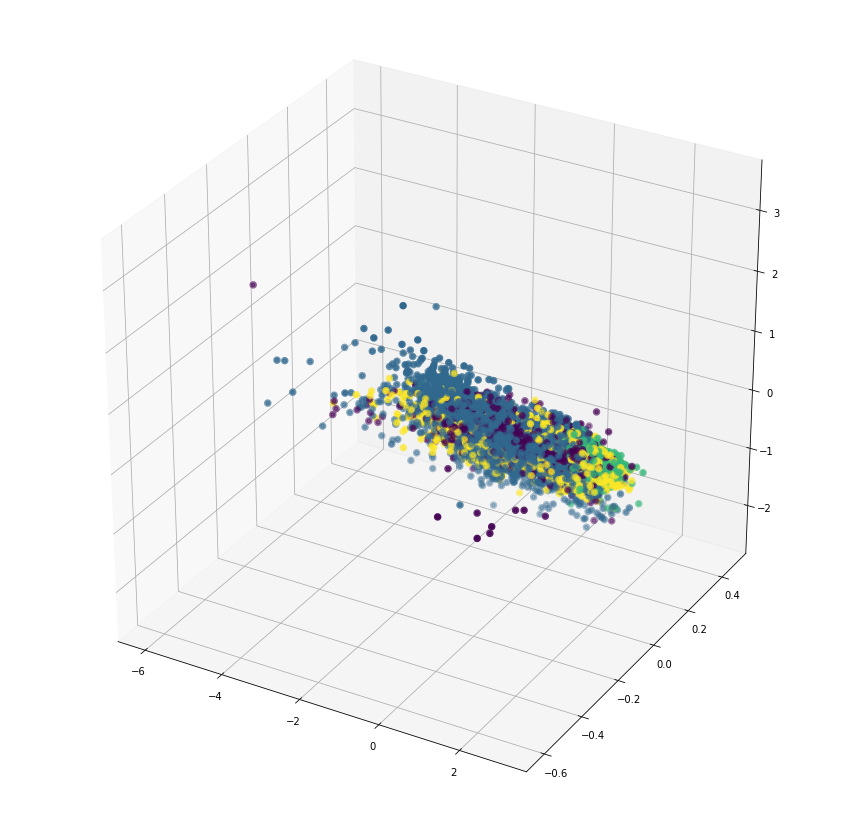

In [95]:
X_1, cl = test.X, test.y
Z_hat, mu, sigma = mod.encoder(X_1.to(device)) #.view(-1,28*28)
Z_hat = Z_hat.cpu().detach().numpy()
mu = mu.cpu().detach().numpy()

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(Z_hat[:,0], Z_hat[:,1], Z_hat[:,2], c=cl, lw=3)
sc = ax.scatter(mu[:,0], mu[:,1], mu[:,2], c=cl, lw=3)

In [ ]:
# když přidám colorbar k obrázku tak se nehezky deformuje, tak je tady zvlášť
plt.colorbar(sc, shrink=1)

In [ ]:
test.y